# Metadata

```{yaml}
Course:   DS 5100
Module:   M05 NumPy
Topic:    NumPy Continued
Author:   R.C. Alvarado (adapted)
Date:     26 June 2022 (revised 13 September 2022)
```

# Quick Refresher on Shape

The **shape** of an array is represented a **tuple**, e.g. `(n, m)` for a 2D array.

* The **length** of the tuple is number of **dimensions** (i.e. axes).
* The **values** of the tuple are the number of **elements** in each dimension (axis).

Consider the array `foo`:

In [1]:
import numpy as np

In [2]:
foo = np.ones((6,4))

In [3]:
foo

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

It was created with the $2$ dimensions.
* The first dimension, axis 0, has $6$ elements. In this case, these elements are arrays.
* The second dimension, axis 1, has $4$ elements. Its elements are scalars (numbers in this case).

The shape of `foo[0]` is $4$. It contains $1$ axis with $4$ elements.

In [4]:
foo[0], foo[0].shape

(array([1., 1., 1., 1.]), (4,))

It has a shape of $1$ and not $4 \times 1$ because it is a vector, not a matrix.

**SO, there is a difference between a vector and a 1-column matrix.**

## Reshaping

If we want to make it into a 1-column matrix, we need to reshape it using `np.reshape()`.

Note that the first value of the shape argument is $-1$. This means use the length of the vector that is passed to it. 

In [5]:
foo2 = np.reshape(foo[0], (-1, 1))

In [6]:
foo2, foo2.shape

(array([[1.],
        [1.],
        [1.],
        [1.]]),
 (4, 1))

When indexing an array, think of the **positions** of the comma-delimitted tuple as the axis.  

The **values** are the **element offsets** in the containing array. The

In [7]:
foo[2:, 2:]
#   ^   ^ 
#   0   1  <- AXIS NUMBER

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

## Use Case

Sometimes, you need to convert vectors into 1-column matrices to make certain linear algebraic functions work.

Consider two random variables, $x$ and $y$. 

In [8]:
x = np.random.randn(100)
y = np.random.randn(100)

We can fit a regression line using the **normal equation**, which appears in this week's homework.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Here is a standward way of expressing it in NumPy:

In [9]:
get_beta1 = lambda x, y: (np.linalg.inv(x.T.dot(x))) * (x.T.dot(y))

However, it will fail if we pass it our two variables, `x` and `y`.

The reason is that it expects `x` to be a matrix, since it is designed to handle n-dimension predictor variables, usually represented as $\textbf{X}$. 

In [10]:
get_beta1(x, y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

The revised function will work with a vector as `x`:

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

In [11]:
get_beta2 = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [12]:
get_beta2(x, y)

0.005433626211376346

We can fix the problem in the general case by converting our vector into a matrix using `np.reshape()`.

In [13]:
x_as_matrix = np.reshape(x, (-1, 1))

In [14]:
get_beta1(x_as_matrix, y)

array([[0.00543363]])

In [15]:
get_beta1(x_as_matrix, y)[0][0]

0.005433626211376346

In [16]:
get_beta1(x_as_matrix, y)[0][0] == get_beta2(x, y)

True

In [17]:
# np.linalg.inv(x.T.dot(x).reshape((-1,1)))

In [18]:
# 1 / x.T.dot(x)

# Array-Oriented Programming

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions **without writing loops**. 

This practice of **replacing explicit loops with array expressions** is referred to by some people as **vectorization**. 

Vectorized array operations are often significantly **faster** than their pure Python equivalents.

They are also **visually concise and elegant**, although loops have the virtue of visualizing what's under the hood in an algorithm.

# Expressing Conditional Logic as Array Operations

## `np.where()`

The `np.where` function is a vectorized version of the ternary expression `x if condition else y`. 

Suppose we had a boolean array and two arrays of values:

In [19]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [20]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [21]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Here is the vectorized version:

In [22]:
result = np.where(cond, xarr, yarr)

In [23]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [24]:
arr = np.random.randn(4, 4)

In [25]:
arr

array([[ 1.36169713, -0.06536016, -0.55258365,  0.86447157],
       [ 1.02411114,  0.7515002 , -0.98418202, -0.76409817],
       [ 0.09925638,  0.04961078, -1.0184644 ,  0.07398149],
       [ 0.40260898, -0.07967764, -0.75289349, -1.33530942]])

In [26]:
arr > 0

array([[ True, False, False,  True],
       [ True,  True, False, False],
       [ True,  True, False,  True],
       [ True, False, False, False]])

In [27]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2,  2, -2, -2],
       [ 2,  2, -2,  2],
       [ 2, -2, -2, -2]])

In [28]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        , -0.06536016, -0.55258365,  2.        ],
       [ 2.        ,  2.        , -0.98418202, -0.76409817],
       [ 2.        ,  2.        , -1.0184644 ,  2.        ],
       [ 2.        , -0.07967764, -0.75289349, -1.33530942]])

# Mathematical and Statistical Methods

Statistical computations are aggregate functions apply to vectors within an array.

In a 2D array, they can be applied to rows or columns, i.e. **axis $0$ or axis $1$**.

Let's create an array of random values. We can think of it is a table of observations and random variables.

In [144]:
arr = np.random.randn(5, 4)

In [145]:
arr

array([[ 1.64468798,  0.59533177,  1.54312983,  0.27837459],
       [-0.73597763, -0.46091256,  0.57496631,  1.09961805],
       [-1.05625286,  0.44218883, -0.10209567, -1.23994893],
       [ 1.27032882, -0.74894464,  1.18589522, -0.21259411],
       [-0.91648529,  0.55807479, -1.04212948,  1.3053897 ]])

## `.mean()`

In [146]:
arr.mean()

0.19913223654332818

In [148]:
np.mean(arr)

0.19913223654332818

In [149]:
arr.mean(axis=1)

array([ 1.01538104,  0.11942354, -0.48902716,  0.37367132, -0.02378757])

In [150]:
arr.mean(axis=0)

array([0.0412602 , 0.07714764, 0.43195324, 0.24616786])

## `.sum()`

In [151]:
arr.sum()

3.9826447308665633

Row wise aggregration

In [152]:
arr.sum(axis=0)

array([0.20630102, 0.3857382 , 2.15976621, 1.2308393 ])

In [153]:
arr.mean(axis=1)

array([ 1.01538104,  0.11942354, -0.48902716,  0.37367132, -0.02378757])

Column-wise aggregration

## `.cumsum()`

In [38]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [39]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [40]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [46]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [48]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

# Methods for Boolean Arrays

## `.sum()`

Since booleans are $0$s and $1$, we can sum them to get a total truth count.

In [49]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

52

In [51]:
bools = np.array([False, False, True, False])

## `.any()`

In [52]:
bools.any()

True

## `.all()`

In [53]:
bools.all()

False

# Sorting 

## `.sort()`

In [54]:
arr = np.random.randn(6)

In [55]:
arr

array([ 0.87498846,  0.80331565,  1.20151756, -0.81940031,  0.41575773,
        0.33649239])

In [56]:
arr.sort()

In [57]:
arr

array([-0.81940031,  0.33649239,  0.41575773,  0.80331565,  0.87498846,
        1.20151756])

In [58]:
arr = np.random.randn(5, 3)

In [59]:
arr

array([[ 0.27009072,  0.50704641, -1.08750804],
       [ 0.36142071, -1.72163973, -0.57971144],
       [ 0.59285035,  0.40916546,  1.04424077],
       [-2.66351908, -0.40555502, -0.00496909],
       [-1.68841403, -0.97006263, -1.203389  ]])

In [60]:
arr.sort(1)

In [61]:
arr

array([[-1.08750804,  0.27009072,  0.50704641],
       [-1.72163973, -0.57971144,  0.36142071],
       [ 0.40916546,  0.59285035,  1.04424077],
       [-2.66351908, -0.40555502, -0.00496909],
       [-1.68841403, -1.203389  , -0.97006263]])

In [63]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6968404113716014

In [64]:
0.05 * len(large_arr)

50.0

# Unique and Other Set Logic

## `np.unique()`

In [66]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [67]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [68]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

## `np.in1d()`

Tests whether each element of a 1-D array is also present in a second array.

In [70]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

# File Input and Output with Arrays

## `np.save()`

Save an array to a binary file in NumPy ``.npy`` format.

Automatically adds the `.npy` file extension.

In [74]:
arr = np.arange(10)
np.save('some_array', arr)

## `np.load()`

In [75]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## `np.savetxt()`

Save an array to a text file.

In [76]:
# np.savetxt?

In [77]:
np.savetxt('some_array.txt', arr)

In [ ]:
# !more some_array.txt

## `np.savez()`

Save several arrays into a single file in uncompressed ``.npz`` format.

In [94]:
np.savez('array_archive.npz', a=arr, b=arr)

In [95]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

Clean up ...

In [97]:
!rm some_array.npy
!rm some_array.txt
!rm array_archive.npz
!rm arrays_compressed.npz

rm: some_array.npy: No such file or directory
rm: some_array.txt: No such file or directory


# Linear Algebra

## `.dot()`

Dot product of two arrays. Specifically,
- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).
- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using `matmul()` or `a @ b` is preferred.
- If either `a` or `b` is 0-D (scalar), it is equivalent to `multiply()`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
- If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
  the last axis of `a` and `b`.
- If `a` is an N-D array and `b` is an M-D array (where `M>=2`), it is a
  sum product over the last axis of `a` and the second-to-last axis of `b`:
  
```
    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
```

In [98]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [99]:
x, y

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 6., 23.],
        [-1.,  7.],
        [ 8.,  9.]]))

In [100]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [101]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [102]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [103]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In NumPy, the `@` operator means [matrix multiplication](https://www.codingem.com/numpy-at-operator/).

In [104]:
x @ np.ones(3)

array([ 6., 15.])

## `np.linalg.inv()`

In [107]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[  8.18818934, -36.70067977, -14.66402327,  17.59345818,
         -6.39979716],
       [-36.70067977, 172.34705014,  71.64413141, -82.33506632,
         30.20351485],
       [-14.66402327,  71.64413141,  31.30816932, -34.20361805,
         12.59984924],
       [ 17.59345818, -82.33506632, -34.20361805,  39.54825384,
        -14.14732737],
       [ -6.39979716,  30.20351485,  12.59984924, -14.14732737,
          5.99759169]])

In [108]:
mat.dot(inv(mat))
q, r = qr(mat)

In [109]:
r

array([[ -9.66925556,   0.67456771,   3.97051934,   8.01207027,
         -3.17939286],
       [  0.        ,  -6.39444917,   0.25667249, -11.28483885,
          5.09926868],
       [  0.        ,   0.        ,  -0.62549873,  -0.42053523,
          0.34386552],
       [  0.        ,   0.        ,   0.        ,  -0.41319349,
         -1.12631602],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.02723589]])

# Pseudorandom Number Generation

## `np.random.normal()`

In [110]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.39842382,  0.95112597, -0.87790381, -0.01881435],
       [ 0.38412385,  0.30068669,  0.85961744,  0.89780247],
       [ 1.03737524, -0.89188526,  0.36669261, -0.71644551],
       [ 0.20700008, -1.35192566, -1.41973149,  0.68826461]])

In [111]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

538 ms ± 9.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.4 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
np.random.seed(1234)

In [115]:
rng = np.random.RandomState(1234)

In [116]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## Example: Random Walks

Let simulate a random walk. The walk will be represented as a vector.

We'll do it first as loop, then with vectorization.

**Loops**

In [117]:
import random
position = 0
walk = [position] # initialize the walk
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # Coin toss
    position += step
    walk.append(position)

In [123]:
import matplotlib.pyplot as plt

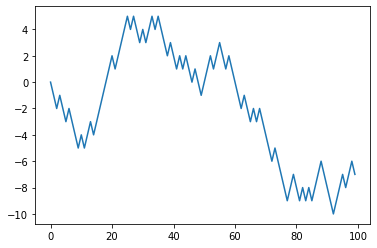

In [124]:
plt.figure()
plt.plot(walk[:100]);

**Vectors**

In [128]:
np.random.seed(12345)

In [129]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk2 = steps.cumsum()

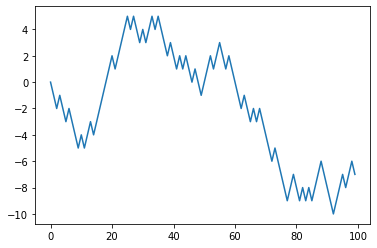

In [130]:
plt.plot(walk[:100]);

In [131]:
walk2.min(), walk2.max()

(-3, 31)

## Simulating Many Random Walks at Once

In [132]:
nwalks = 5000
nsteps = 1000

In [133]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [134]:
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [135]:
walks.max(), walks.min()

(138, -133)

In [136]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [137]:
hits30.sum() # Number that hit 30 or -30

3410

In [138]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [139]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [140]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # Walks: observations, Steps: features

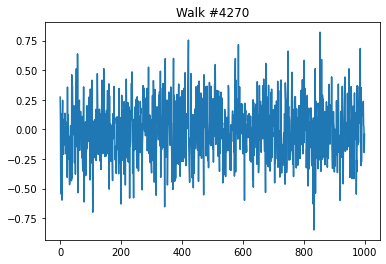

In [141]:
sample_walk = np.random.choice(len(draws))
plt.plot(draws[sample_walk])
plt.title(f"Walk #{sample_walk}");